In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message=".*no associated frequency.*")

In [2]:
df = pd.read_excel("../merged_data.xlsx",) 

In [3]:
df.head()

,date,day,time,jay,dheeraj,shashi,total,dheeraj_hours,shashi_hours,tips: shashi,...,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny,sunny_hours,siddharth,atharv,atharv_hours
0,2025-04-01,Tuesday,11 TO 8,306.0,NaN,NaN,306.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-02,Wednesday,11 TO 8,NaN,117.0,NaN,117.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-04-03,Thursday,11 TO 8,405.0,NaN,NaN,405.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-04-04,Friday,11 TO 9,NaN,650.0,NaN,650.0,5.5,9.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-04-05,Saturday,10 TO 9,NaN,615.0,NaN,615.0,10.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(995, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   977 non-null    datetime64[ns]
 1   day                    978 non-null    object        
 2   time                   981 non-null    object        
 3   jay                    186 non-null    float64       
 4   dheeraj                243 non-null    float64       
 5   shashi                 138 non-null    float64       
 6   total                  981 non-null    float64       
 7   dheeraj_hours          342 non-null    float64       
 8   shashi_hours           162 non-null    float64       
 9   tips: shashi           81 non-null     float64       
 10  tips: dheeraj          145 non-null    float64       
 11  source_file            995 non-null    object        
 12  file_month             995 non-null    int64         
 13  file_

In [6]:
df.drop(columns=['dheeraj','yash','jay','nithin','shashi','siddharth','atharv','sunny','file_month','file_year','source_file'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   977 non-null    datetime64[ns]
 1   day                    978 non-null    object        
 2   time                   981 non-null    object        
 3   total                  981 non-null    float64       
 4   dheeraj_hours          342 non-null    float64       
 5   shashi_hours           162 non-null    float64       
 6   tips: shashi           81 non-null     float64       
 7   tips: dheeraj          145 non-null    float64       
 8   yash_hours             301 non-null    float64       
 9   total_employees_hours  30 non-null     float64       
 10  total_employees        30 non-null     float64       
 11  nithin_hours           148 non-null    float64       
 12  tips: yash             41 non-null     float64       
 13  sunny

In [8]:
df.dtypes

date                     datetime64[ns]
day                              object
time                             object
total                           float64
dheeraj_hours                   float64
shashi_hours                    float64
tips: shashi                    float64
tips: dheeraj                   float64
yash_hours                      float64
total_employees_hours           float64
total_employees                 float64
nithin_hours                    float64
tips: yash                      float64
sunny_hours                     float64
atharv_hours                    float64
dtype: object

In [9]:
column_types = {
    'date': 'datetime64[ns]',
    'day': 'string',
    'time': 'string',
    'total': 'float',
    'dheeraj_hours': 'float',
    'yash_hours': 'float',
    'total_employees_hours': 'float',
    'total_employees': 'Int64',  # Use nullable Int64
    'nithin_hours': 'float',
    'atharv_hours': 'float',
    'tips: yash': 'float',
    'tips: dheeraj': 'float',
    'shashi_hours': 'float',
    'tips: shashi': 'float',
    'sunny_hours': 'float',
}

for col, dtype in column_types.items():
    if col in df.columns:
        if dtype == 'datetime64[ns]':
            df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce') if 'float' in dtype or 'int' in dtype else df[col].astype(dtype)


In [10]:
df.dtypes

date                     datetime64[ns]
day                      string[python]
time                     string[python]
total                           float64
dheeraj_hours                   float64
shashi_hours                    float64
tips: shashi                    float64
tips: dheeraj                   float64
yash_hours                      float64
total_employees_hours           float64
total_employees                   Int64
nithin_hours                    float64
tips: yash                      float64
sunny_hours                     float64
atharv_hours                    float64
dtype: object

In [11]:
df.head()

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours
0,2025-04-01,Tuesday,11 TO 8,306.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2,2025-04-03,Thursday,11 TO 8,405.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
3,2025-04-04,Friday,11 TO 9,650.0,5.5,9.0,2.5,13.64,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
4,2025-04-05,Saturday,10 TO 9,615.0,10.0,6.0,NaN,3.00,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['date', 'day', 'time', 'total', 'dheeraj_hours', 'shashi_hours',
       'tips: shashi', 'tips: dheeraj', 'yash_hours', 'total_employees_hours',
       'total_employees', 'nithin_hours', 'tips: yash', 'sunny_hours',
       'atharv_hours'],
      dtype='object')

In [13]:
# employee_hours_cols = ['dheeraj_hours', 'yash_hours', 'nithin_hours', 'atharv_hours', 'shashi_hours', 'sunny_hours']

# # Create the new column
# df['employees_present'] = df[employee_hours_cols].ge(1).sum(axis=1)


In [14]:
# Count rows where every column is null
empty_rows_count = df.isna().all(axis=1).sum()

empty_rows_count

5

In [15]:
empty_rows = df[df.isna().all(axis=1)]
empty_rows

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours
30,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
339,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
340,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
621,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
748,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [16]:
# df= df[~df[df.isna().all(axis=1)]] can be used but it is not efficient
df = df.dropna(how="all")

In [17]:
df.isna().all(axis=1).sum()

0

In [18]:
df.dtypes

date                     datetime64[ns]
day                      string[python]
time                     string[python]
total                           float64
dheeraj_hours                   float64
shashi_hours                    float64
tips: shashi                    float64
tips: dheeraj                   float64
yash_hours                      float64
total_employees_hours           float64
total_employees                   Int64
nithin_hours                    float64
tips: yash                      float64
sunny_hours                     float64
atharv_hours                    float64
dtype: object

In [19]:
df.day.unique()

<StringArray>
[  'Tuesday', 'Wednesday',  'Thursday',    'Friday',  'Saturday',    'Sunday',
    'Monday',        <NA>,       'Tue',       'Wed',       'Thu',       'Fri',
       'Sat',       'Sun',       'Mon',    'sunday',       '340',         '`']
Length: 18, dtype: string

In [20]:
df['day'] = df['day'].replace({
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday',
    'sunday': 'Sunday'
})

In [21]:
print(df['day'].unique())

<StringArray>
[  'Tuesday', 'Wednesday',  'Thursday',    'Friday',  'Saturday',    'Sunday',
    'Monday',        <NA>,       '340',         '`']
Length: 10, dtype: string


In [22]:
valid_days = {
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
}

invalid_days = df.loc[~df["day"].isin(valid_days) & df["day"].notna(), "day"]
df = df[df["day"].isin(valid_days)]

In [23]:
#null count summary

def null_report (df):
    null_summary = df.isnull().sum().to_frame(name='Null Count')
    null_summary['% Missing'] = (null_summary['Null Count'] / len(df) * 100).round(2)
    null_summary = null_summary[null_summary['Null Count'] > 0]  # Optional: show only columns with missing values
    print(null_summary)

In [24]:
null_report(df)

                       Null Count  % Missing
total                           4       0.41
dheeraj_hours                 634      64.96
shashi_hours                  814      83.40
tips: shashi                  895      91.70
tips: dheeraj                 832      85.25
yash_hours                    675      69.16
total_employees_hours         946      96.93
total_employees               946      96.93
nithin_hours                  828      84.84
tips: yash                    935      95.80
sunny_hours                   953      97.64
atharv_hours                  973      99.69


In [25]:
columns_to_fill = ['dheeraj_hours', 'yash_hours','total_employees_hours', 'total_employees','nithin_hours','atharv_hours','tips: yash','tips: dheeraj','shashi_hours','tips: shashi','sunny_hours']  # replace with your actual column names

# Fill missing values with 0
df.loc[:, columns_to_fill] = df.loc[:, columns_to_fill].fillna(0)


In [26]:
df.head()

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours
0,2025-04-01,Tuesday,11 TO 8,306.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2025-04-03,Thursday,11 TO 8,405.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2025-04-04,Friday,11 TO 9,650.0,5.5,9.0,2.5,13.64,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2025-04-05,Saturday,10 TO 9,615.0,10.0,6.0,0.0,3.00,0.0,0.0,0,0.0,0.0,0.0,0.0


In [27]:
df.columns

Index(['date', 'day', 'time', 'total', 'dheeraj_hours', 'shashi_hours',
       'tips: shashi', 'tips: dheeraj', 'yash_hours', 'total_employees_hours',
       'total_employees', 'nithin_hours', 'tips: yash', 'sunny_hours',
       'atharv_hours'],
      dtype='object')

In [28]:
df.dtypes

date                     datetime64[ns]
day                      string[python]
time                     string[python]
total                           float64
dheeraj_hours                   float64
shashi_hours                    float64
tips: shashi                    float64
tips: dheeraj                   float64
yash_hours                      float64
total_employees_hours           float64
total_employees                   Int64
nithin_hours                    float64
tips: yash                      float64
sunny_hours                     float64
atharv_hours                    float64
dtype: object

In [29]:
df.loc[:, 'total_employees_hours'] = df[
    ['dheeraj_hours', 'yash_hours', 'nithin_hours', 'shashi_hours', 'atharv_hours', 'sunny_hours']
].sum(axis=1)


In [30]:
df.head()

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours
0,2025-04-01,Tuesday,11 TO 8,306.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,0.0,0.0,0.00,0.0,5.0,0,0.0,0.0,0.0,0.0
2,2025-04-03,Thursday,11 TO 8,405.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2025-04-04,Friday,11 TO 9,650.0,5.5,9.0,2.5,13.64,0.0,14.5,0,0.0,0.0,0.0,0.0
4,2025-04-05,Saturday,10 TO 9,615.0,10.0,6.0,0.0,3.00,0.0,16.0,0,0.0,0.0,0.0,0.0


In [31]:
df.head()

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours
0,2025-04-01,Tuesday,11 TO 8,306.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,0.0,0.0,0.00,0.0,5.0,0,0.0,0.0,0.0,0.0
2,2025-04-03,Thursday,11 TO 8,405.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2025-04-04,Friday,11 TO 9,650.0,5.5,9.0,2.5,13.64,0.0,14.5,0,0.0,0.0,0.0,0.0
4,2025-04-05,Saturday,10 TO 9,615.0,10.0,6.0,0.0,3.00,0.0,16.0,0,0.0,0.0,0.0,0.0


In [32]:
df.loc[:, 'total_tips'] = df[['tips: yash','tips: dheeraj','tips: shashi']].sum(axis=1)

In [33]:
df.head()

,date,day,time,total,dheeraj_hours,shashi_hours,tips: shashi,tips: dheeraj,yash_hours,total_employees_hours,total_employees,nithin_hours,tips: yash,sunny_hours,atharv_hours,total_tips
0,2025-04-01,Tuesday,11 TO 8,306.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,0.0,0.0,0.00,0.0,5.0,0,0.0,0.0,0.0,0.0,0.00
2,2025-04-03,Thursday,11 TO 8,405.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00
3,2025-04-04,Friday,11 TO 9,650.0,5.5,9.0,2.5,13.64,0.0,14.5,0,0.0,0.0,0.0,0.0,16.14
4,2025-04-05,Saturday,10 TO 9,615.0,10.0,6.0,0.0,3.00,0.0,16.0,0,0.0,0.0,0.0,0.0,3.00


In [34]:
df2 = df.drop(columns=['dheeraj_hours', 'yash_hours', 'nithin_hours','shashi_hours', 'atharv_hours', 'sunny_hours','tips: yash', 'tips: dheeraj', 'tips: shashi'])

In [35]:
df2.head()

,date,day,time,total,total_employees_hours,total_employees,total_tips
0,2025-04-01,Tuesday,11 TO 8,306.0,0.0,0,0.00
1,2025-04-02,Wednesday,11 TO 8,117.0,5.0,0,0.00
2,2025-04-03,Thursday,11 TO 8,405.0,0.0,0,0.00
3,2025-04-04,Friday,11 TO 9,650.0,14.5,0,16.14
4,2025-04-05,Saturday,10 TO 9,615.0,16.0,0,3.00


In [36]:
null_report(df2)

       Null Count  % Missing
total           4       0.41


In [37]:
df2[df2.total.isna()]

,date,day,time,total,total_employees_hours,total_employees,total_tips
185,2023-12-31,Sunday,11 TO 6,NaN,3.0,0,0.0
741,2022-11-24,Thursday,10 TO 9,NaN,0.0,0,0.0
840,2023-12-01,Tuesday,11 TO 8,NaN,0.0,0,0.0
871,2023-10-31,Tuesday,11 TO 8,NaN,5.0,0,0.0


In [38]:
df2[df2.total.isna()]

,date,day,time,total,total_employees_hours,total_employees,total_tips
185,2023-12-31,Sunday,11 TO 6,NaN,3.0,0,0.0
741,2022-11-24,Thursday,10 TO 9,NaN,0.0,0,0.0
840,2023-12-01,Tuesday,11 TO 8,NaN,0.0,0,0.0
871,2023-10-31,Tuesday,11 TO 8,NaN,5.0,0,0.0


In [39]:
df2.isnull().sum()


date                     0
day                      0
time                     0
total                    4
total_employees_hours    0
total_employees          0
total_tips               0
dtype: int64

In [40]:
df2.dropna(subset=['total'], inplace=True)
df2.isnull().sum()

date                     0
day                      0
time                     0
total                    0
total_employees_hours    0
total_employees          0
total_tips               0
dtype: int64

In [41]:
# IMPORTANT: Don't forward-fill the target (`total`) before evaluation (data leakage).
# Since only a few rows have missing totals, we drop them instead.
df2 = df2.sort_values('date').reset_index(drop=True)
df2 = df2.dropna(subset=['total']).copy()

In [42]:
df2.isnull().sum()

date                     0
day                      0
time                     0
total                    0
total_employees_hours    0
total_employees          0
total_tips               0
dtype: int64

In [43]:
df2[df2.date.isin(['2023-10-31','2023-12-01','2022-11-24','2023-12-31'])]

/var/folders/tz/0wsl7jgx4t5g2_qdx0vgfwfr0000gn/T/ipykernel_69287/744438460.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df2[df2.date.isin(['2023-10-31','2023-12-01','2022-11-24','2023-12-31'])]


,date,day,time,total,total_employees_hours,total_employees,total_tips
213,2023-12-01,Friday,10 TO 9,162.0,17.0,0,0.0


In [44]:
df2.total_tips.describe()

count    972.000000
mean       2.509167
std        6.152961
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       63.400000
Name: total_tips, dtype: float64

In [45]:
df2.total.describe()

count     972.000000
mean      393.501677
std       318.813034
min         0.000000
25%       187.750000
50%       325.000000
75%       505.000000
max      2822.000000
Name: total, dtype: float64

In [46]:
df2.head()

,date,day,time,total,total_employees_hours,total_employees,total_tips
0,2022-11-01,Tuesday,10 TO 9,147.0,8.5,0,0.0
1,2022-11-02,Wednesday,10 TO 9,81.0,0.0,0,0.0
2,2022-11-03,Thursday,10 TO 9,18.0,0.0,0,0.0
3,2022-11-04,Friday,10 TO 9,27.0,9.0,0,0.0
4,2022-11-05,Saturday,11 TO 9,260.0,10.0,0,0.0


In [47]:
df2.total_employees_hours.describe()

count    972.000000
mean       8.142901
std        5.496912
min        0.000000
25%        5.000000
50%        8.500000
75%       10.000000
max       33.000000
Name: total_employees_hours, dtype: float64

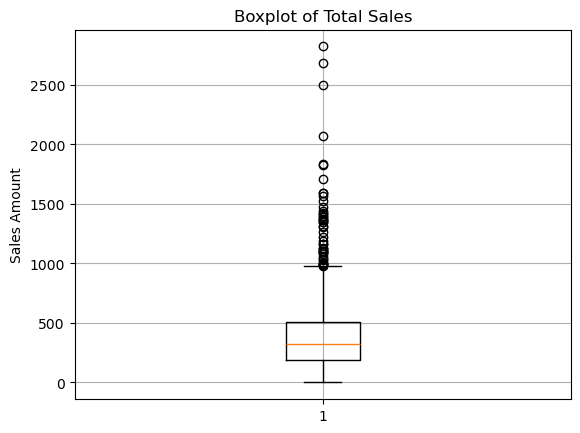

In [48]:
plt.boxplot(df2['total'].dropna())  # dropna() to avoid errors from NaNs
plt.title("Boxplot of Total Sales")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

In [49]:
quarterly_sales = df2.groupby(df2['date'].dt.to_period('Q'))['total'].sum().reset_index()

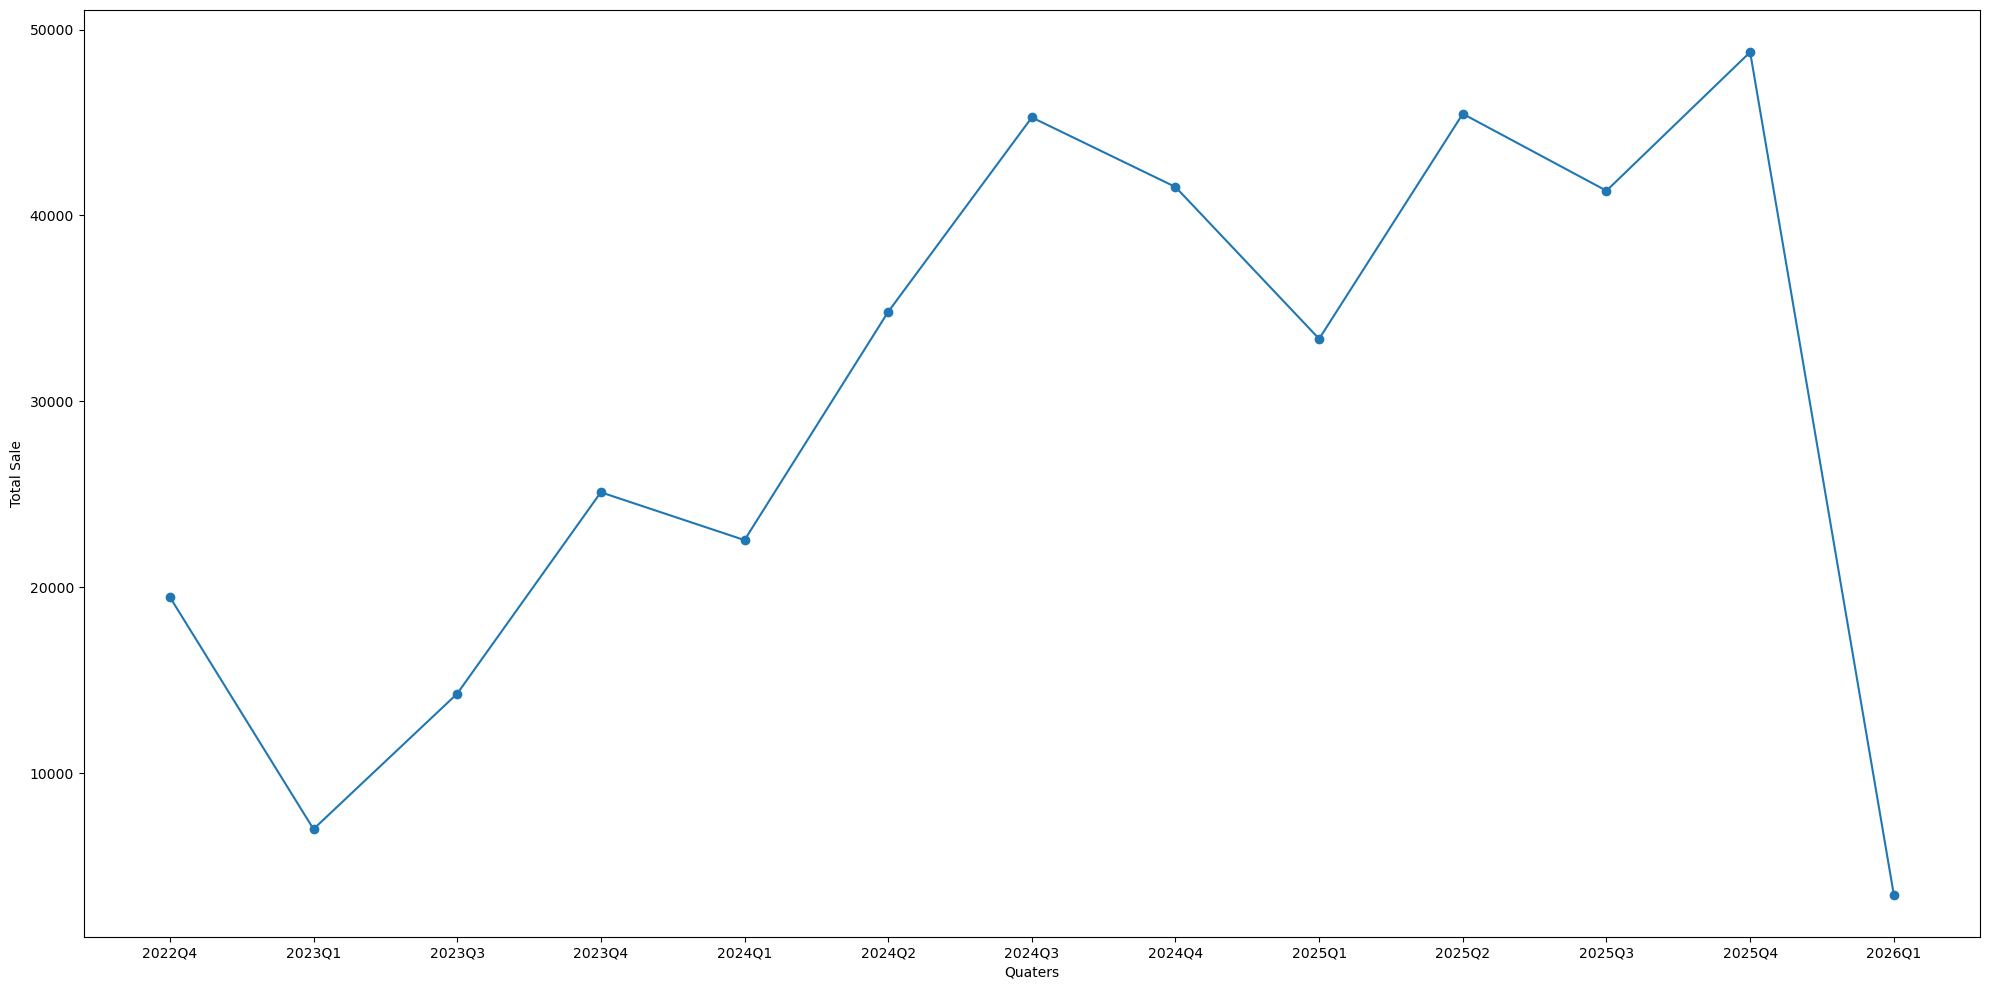

In [50]:
# plt.bar(quarterly_sales,x='Quarters',y='total sales')\
from matplotlib import markers


plt.figure(figsize=(20,10))
plt.plot(quarterly_sales['date'].astype(str), quarterly_sales['total'],marker='o')
plt.xlabel('Quaters')
plt.ylabel('Total Sale')
plt.tight_layout()
plt.show()

<Axes: >

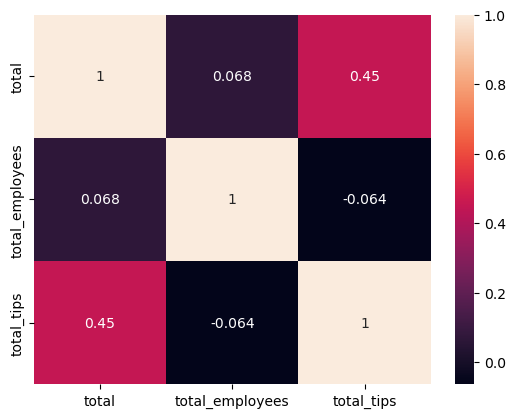

In [51]:
corelation_matrix=df2[['total','total_employees','total_tips']].corr()
sns.heatmap(corelation_matrix,annot=True)


In [52]:
df2.head()

,date,day,time,total,total_employees_hours,total_employees,total_tips
0,2022-11-01,Tuesday,10 TO 9,147.0,8.5,0,0.0
1,2022-11-02,Wednesday,10 TO 9,81.0,0.0,0,0.0
2,2022-11-03,Thursday,10 TO 9,18.0,0.0,0,0.0
3,2022-11-04,Friday,10 TO 9,27.0,9.0,0,0.0
4,2022-11-05,Saturday,11 TO 9,260.0,10.0,0,0.0


In [53]:
df2.columns

Index(['date', 'day', 'time', 'total', 'total_employees_hours',
       'total_employees', 'total_tips'],
      dtype='object')

In [54]:
df2['month'] = df2['date'].dt.month

df2['week'] = df2['date'].dt.isocalendar().week

In [55]:
df2.head(15)

,date,day,time,total,total_employees_hours,total_employees,total_tips,month,week
0,2022-11-01,Tuesday,10 TO 9,147.0,8.5,0,0.0,11,44
1,2022-11-02,Wednesday,10 TO 9,81.0,0.0,0,0.0,11,44
2,2022-11-03,Thursday,10 TO 9,18.0,0.0,0,0.0,11,44
3,2022-11-04,Friday,10 TO 9,27.0,9.0,0,0.0,11,44
4,2022-11-05,Saturday,11 TO 9,260.0,10.0,0,0.0,11,44
5,2022-11-06,Sunday,10 TO 8,81.0,10.0,0,0.0,11,44
6,2022-11-07,Monday,10 TO 9,306.0,9.0,0,0.0,11,45
7,2022-11-08,Tuesday,10 TO 9,123.0,0.0,0,0.0,11,45
8,2022-11-09,Wednesday,10 TO 9,90.0,0.0,0,0.0,11,45
9,2022-11-10,Thursday,10 TO 9,108.0,0.0,0,0.0,11,45


In [56]:
df2['year'] = df2['date'].dt.year
df2['quarter'] = df2['date'].dt.quarter
df2['is_weekend'] = df2['day'].isin(['Saturday','Sunday']).astype(bool)

In [57]:
yearly_sale = df2.groupby(by= 'year').total.sum().reset_index()

In [58]:
print(yearly_sale)

   year      total
0  2022   19484.00
1  2023   46405.00
2  2024  144165.63
3  2025  168947.00
4  2026    3482.00


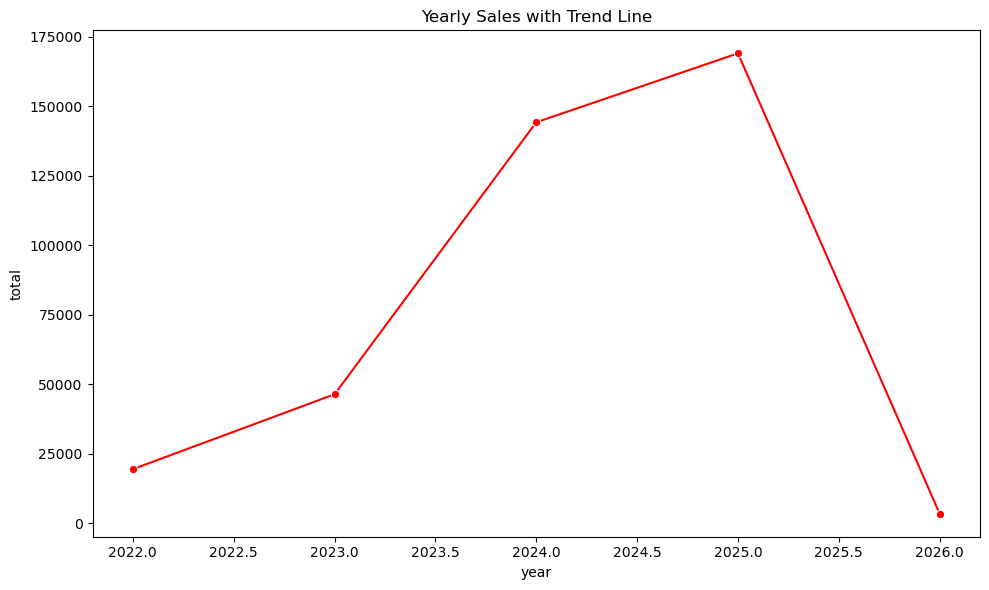

In [59]:
plt.figure(figsize=(10, 6))
# sns.barplot(data=yearly_sale, x='year', y='total', color='skyblue')
sns.lineplot(data=yearly_sale, x='year', y='total', color='red', marker='o')
plt.title("Yearly Sales with Trend Line")
plt.tight_layout()
plt.show()


In [60]:
df2.dtypes

date                     datetime64[ns]
day                      string[python]
time                     string[python]
total                           float64
total_employees_hours           float64
total_employees                   Int64
total_tips                      float64
month                             int32
week                             UInt32
year                              int32
quarter                           int32
is_weekend                         bool
dtype: object

In [61]:
from pandas.api.types import CategoricalDtype

day_wise_sales = df2.groupby(by='day')[['total','total_tips']].sum().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = CategoricalDtype(categories=days_order, ordered=True)
day_wise_sales['day'] = day_wise_sales['day'].astype(cat_dtype)
day_wise_sales = day_wise_sales.sort_values('day')
melted = day_wise_sales.melt(id_vars='day', value_vars=['total', 'total_tips'],
                             var_name='Metric', value_name='Amount')
print(melted)

          day      Metric    Amount
0      Monday       total  45508.00
1     Tuesday       total  50646.63
2   Wednesday       total  47908.00
3    Thursday       total  45933.00
4      Friday       total  64400.00
5    Saturday       total  77393.00
6      Sunday       total  50695.00
7      Monday  total_tips    338.56
8     Tuesday  total_tips    288.71
9   Wednesday  total_tips    261.44
10   Thursday  total_tips    213.45
11     Friday  total_tips    333.75
12   Saturday  total_tips    484.62
13     Sunday  total_tips    518.38


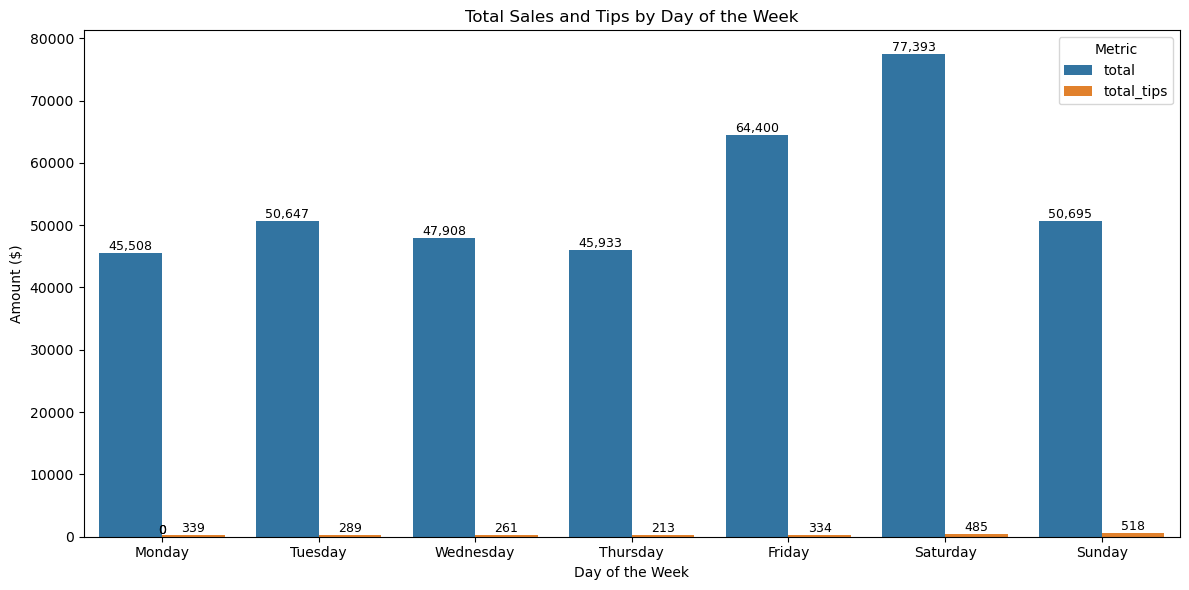

In [62]:
# Step 4: Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted, x='day', y='Amount', hue='Metric')

# Step 5: Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # skip NaNs
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height,
            s=f'{height:,.0f}',  # format number
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Total Sales and Tips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Amount ($)")
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Calculating Moving Average

In [63]:
# # Ensure date is index
df2 = df2.sort_values("date")
df2.set_index("date", inplace=True)


In [64]:
df2['total:10_days_rolling']=df2['total'].rolling(window=10, min_periods=1).mean() 
df2['total:30_days_rolling']=df2['total'].rolling(window=30, min_periods=1).mean() 
df2['total:50_days_rolling']=df2['total'].rolling(window=50, min_periods=1).mean() 

<Axes: xlabel='date'>

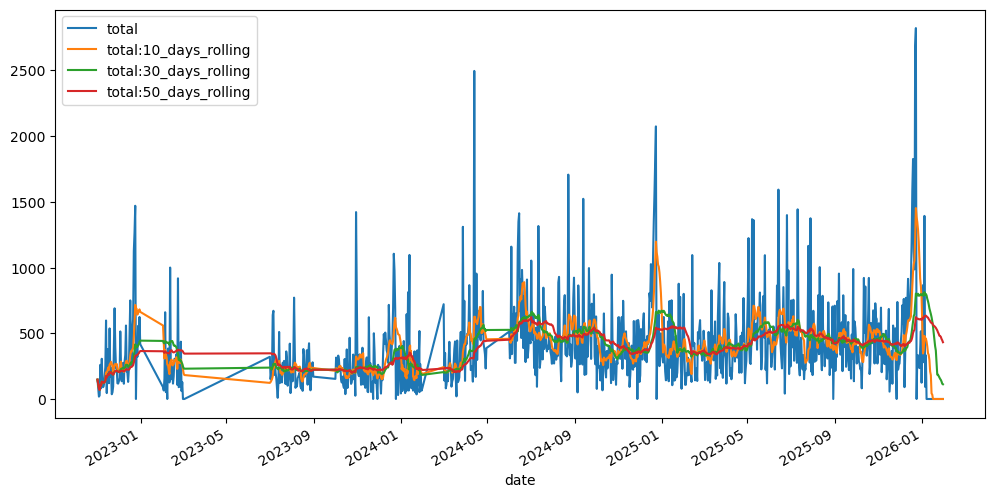

In [65]:
df2[['total','total:10_days_rolling','total:30_days_rolling','total:50_days_rolling']].plot(figsize=(12,6))

<Axes: xlabel='date'>

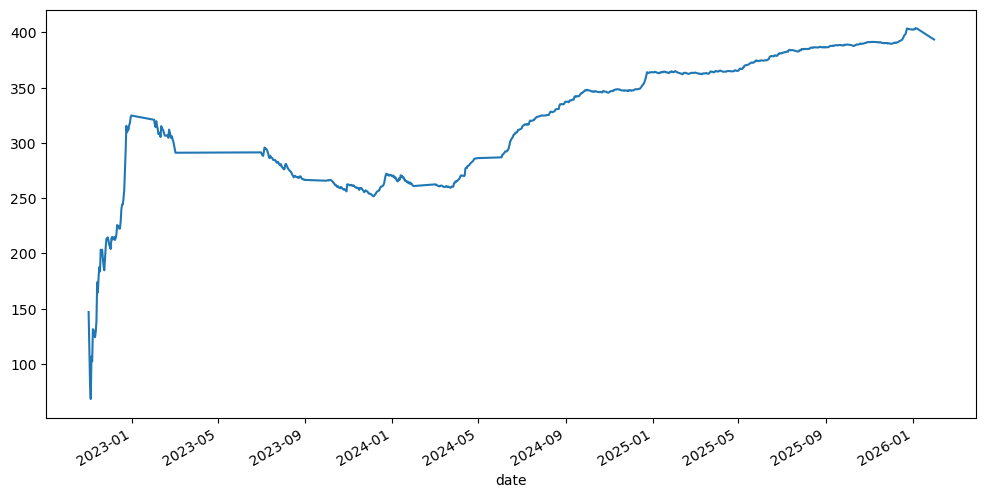

In [66]:
# Cumulative Moving Average 
df2['total'].expanding().mean().plot(figsize=(12,6))

In [67]:
# EWMA Exponential Weighted Moving Average



# Classical Time Series Decomposition

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(df2['total'], model='additive', period= 7)# Model Building

In [69]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

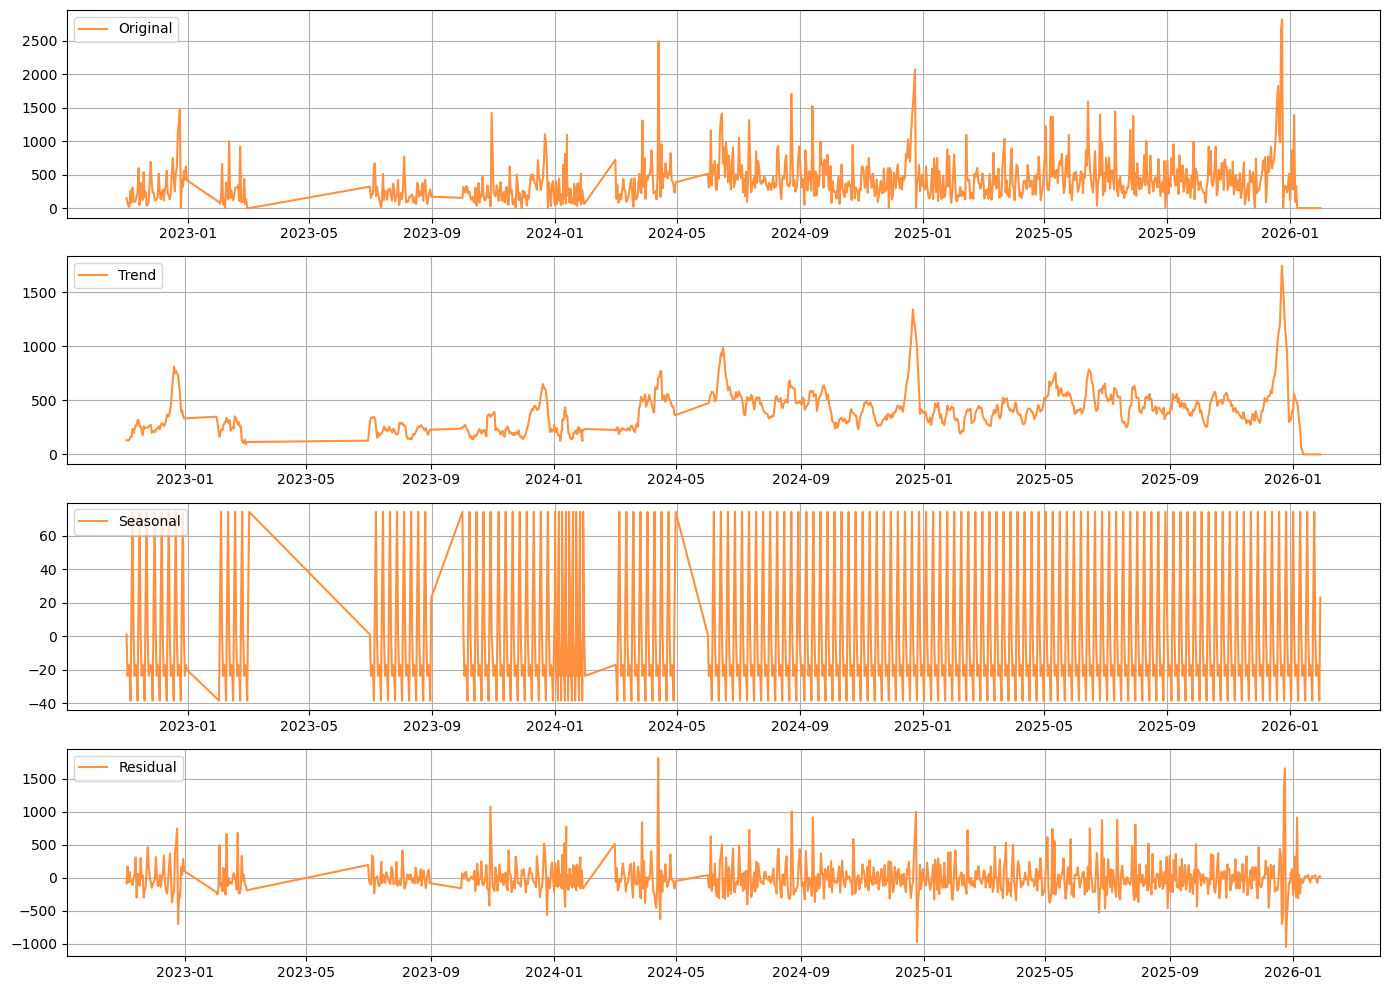

In [71]:
plt.figure(figsize= (14,10))
plt.subplot(411)
plt.plot(df2['total'], label = 'Original', color = '#FF9140')
plt.grid(True)
plt.legend(loc= 'upper left')
plt.subplot(412)
plt.grid(True)
plt.plot(trend_additive, label = 'Trend', color = '#FF9140')
plt.legend(loc= 'upper left')
plt.subplot(413)
plt.grid(True)
plt.plot(seasonal_additive, label = 'Seasonal', color = '#FF9140')
plt.legend(loc= 'upper left')
plt.subplot(414)
plt.grid(True)
plt.plot(residual_additive, label = 'Residual', color = '#FF9140')
plt.legend(loc= 'upper left')
plt.tight_layout()
plt.show()



In [72]:
df2.is_weekend = df2.is_weekend.astype('int')

In [73]:
df2[df2['total']==0]

,day,time,total,total_employees_hours,total_employees,total_tips,month,week,year,quarter,is_weekend,total:10_days_rolling,total:30_days_rolling,total:50_days_rolling
date,,,,,,,,,,,,,,
2022-12-25,Sunday,10 TO 9,0.0,0.0,0,0.0,12,51,2022,4,1,693.2,392.666667,328.90
2023-02-07,Tuesday,10 TO 9,0.0,7.5,0,0.0,2,6,2023,1,0,261.9,426.233333,350.28
2023-03-01,Wednesday,10 TO 9,0.0,0.0,0,0.0,3,9,2023,1,0,227.1,247.366667,360.46
2023-03-02,Thursday,10 TO 9,0.0,0.0,0,0.0,3,9,2023,1,0,192.9,233.466667,349.28
2023-03-03,Friday,10 TO 9,0.0,0.0,0,0.0,3,9,2023,1,0,182.1,230.466667,345.14
2023-11-23,Thursday,11 TO 8,0.0,0.0,0,0.0,11,47,2023,4,0,180.5,234.800000,221.66
2023-11-29,Wednesday,11 TO 7,0.0,7.5,0,0.0,11,48,2023,4,0,155.8,243.133333,218.30
2023-12-25,Monday,10 TO 9,0.0,0.0,0,0.0,12,52,2023,4,0,545.7,367.666667,304.82
2024-11-28,Thursday,11 TO 8,0.0,0.0,0,0.0,11,48,2024,4,0,318.0,369.600000,349.30


In [ ]:
df2.d

,day,time,total,total_employees_hours,total_employees,total_tips,month,week,year,quarter,is_weekend,total:10_days_rolling,total:30_days_rolling,total:50_days_rolling
date,,,,,,,,,,,,,,
2022-11-01,Tuesday,10 TO 9,147.0,8.5,0,0.0,11,44,2022,4,0,147.00,147.00,147.00
2022-11-02,Wednesday,10 TO 9,81.0,0.0,0,0.0,11,44,2022,4,0,114.00,114.00,114.00
2022-11-03,Thursday,10 TO 9,18.0,0.0,0,0.0,11,44,2022,4,0,82.00,82.00,82.00
2022-11-04,Friday,10 TO 9,27.0,9.0,0,0.0,11,44,2022,4,0,68.25,68.25,68.25
2022-11-05,Saturday,11 TO 9,260.0,10.0,0,0.0,11,44,2022,4,1,106.60,106.60,106.60


In [76]:
df2['is_future'] = df2.index > '2026-01-07'

df2['is_closed'] = (
    (df2['total'] == 0) &
    (df2['total_employees_hours'] == 0) &
    (df2['total_employees'] == 0)
)

df2['is_suspicious_zero'] = (
    (df2['total'] == 0) &
    (df2['total_employees_hours'] > 0)
)


In [77]:
# Drop future data

df2 = df2[~df2['is_future']]

# Drop suspicious zeros
df2 = df2[~df2['is_suspicious_zero']]

df2['store_open'] = (~df2['is_closed']).astype(int)


In [78]:
df2.head()

,day,time,total,total_employees_hours,total_employees,total_tips,month,week,year,quarter,is_weekend,total:10_days_rolling,total:30_days_rolling,total:50_days_rolling,is_future,is_closed,is_suspicious_zero,store_open
date,,,,,,,,,,,,,,,,,,
2022-11-01,Tuesday,10 TO 9,147.0,8.5,0,0.0,11,44,2022,4,0,147.00,147.00,147.00,False,False,False,1
2022-11-02,Wednesday,10 TO 9,81.0,0.0,0,0.0,11,44,2022,4,0,114.00,114.00,114.00,False,False,False,1
2022-11-03,Thursday,10 TO 9,18.0,0.0,0,0.0,11,44,2022,4,0,82.00,82.00,82.00,False,False,False,1
2022-11-04,Friday,10 TO 9,27.0,9.0,0,0.0,11,44,2022,4,0,68.25,68.25,68.25,False,False,False,1
2022-11-05,Saturday,11 TO 9,260.0,10.0,0,0.0,11,44,2022,4,1,106.60,106.60,106.60,False,False,False,1


## Stationarity Tests:

### 1. ADF Test

In [79]:
from statsmodels.tsa.stattools import adfuller

#Perform ADF test on total sales

adf_test = adfuller(df2['total'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0], 4)}')
print(f'p-value: {round(adf_test[1], 4)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'  {key}: {value}')
if adf_test[1] <= 0.05:
    print("Series is likely stationary") #Null Hypothesis is rejected
else:
    print("Series is likely non-stationary") #Null Hypothesis is accepted 



ADF Test Results:
ADF Statistic: -6.7118
p-value: 0.0
Critical Values:
  1%: -3.4373332444652944
  5%: -2.864622912101569
  10%: -2.568411524473161
Series is likely stationary


### 2. KPSS Test



In [80]:
from statsmodels.tsa.stattools import kpss

#Perform KPSS test on total sales

kpss_test = kpss(df2['total'], regression='ct') # 'c' for constant, 'ct' for constant and trend, 'n' for no constant and no trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0], 3)}')
print(f'p-value: {round(kpss_test[1], 3)}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'  {key}: {value}')
if kpss_test[1] <= 0.05:
    print("Series is likely stationary")
else:
    print("Series is likely non-stationary")

KPSS Test Results:
KPSS Statistic: 0.129
p-value: 0.082
Critical Values:
  10%: 0.119
  5%: 0.146
  2.5%: 0.176
  1%: 0.216
Series is likely non-stationary


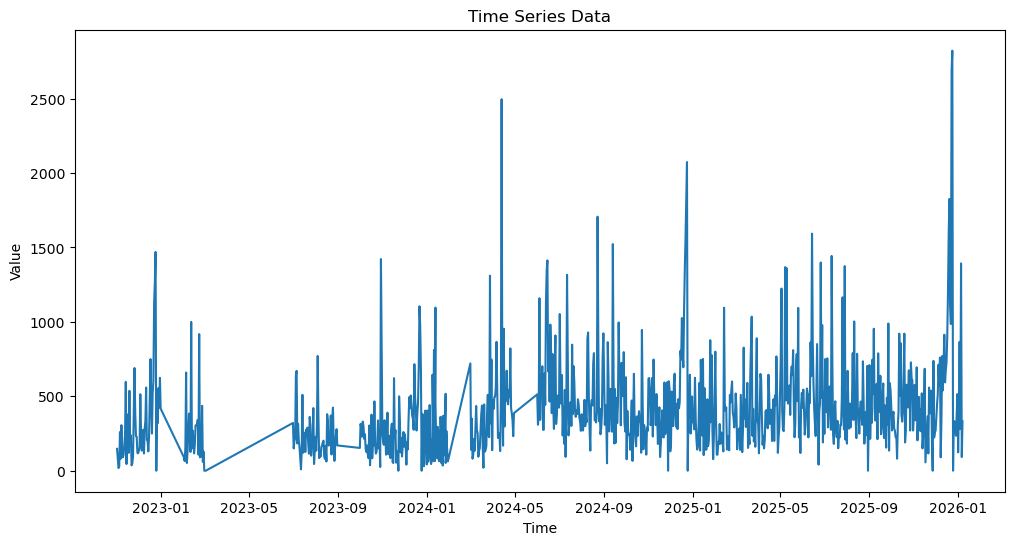

KS statistic for strict stationarity: 0.23044397463002114
KS p-value for strict stationarity: 2.0203601485584346e-11


In [81]:
# Check if the data is strict stationary or not

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def ks_test_stationarity(data):
   split = len(data) // 2
   first_half = data[:split]
   second_half = data[split:]
   statistic, p_value = ks_2samp(first_half, second_half)
   return statistic, p_value


# Perform the KS test for stationarity
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(df2['total'])

# Plotting the series
plt.figure(figsize=(12, 6))
plt.plot(df2['total'])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
print(f"KS statistic for strict stationarity: {ks_stat_strict}")
print(f"KS p-value for strict stationarity: {ks_pvalue_strict}")

## Seasonality Analysis and Anamoly Detection

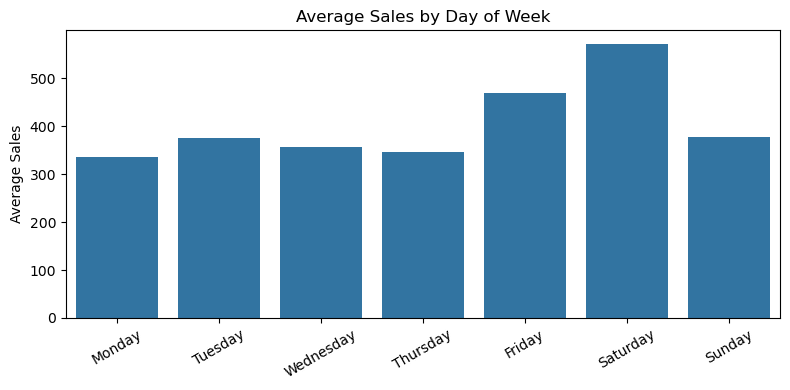

In [86]:
# Sales by Day of Week
df2['day_of_week'] = df2.index.day_name()

dow_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

avg_dow = (
    df2.groupby('day_of_week')['total']
       .mean()
       .reindex(dow_order)
)

plt.figure(figsize=(8,4))
sns.barplot(x=avg_dow.index, y=avg_dow.values)
plt.title('Average Sales by Day of Week')
plt.ylabel('Average Sales')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


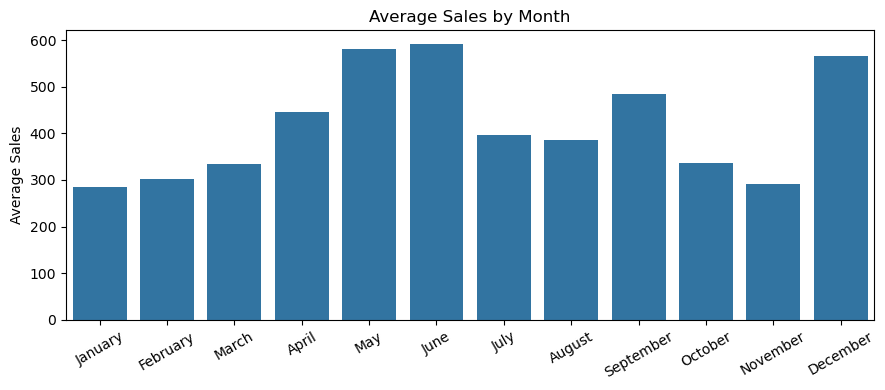

In [88]:
# Sale by Month
df2['month'] = df2.index.month
df2['month_name'] = df2.index.month_name()

month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

avg_month = (
    df2.groupby('month_name')['total']
       .mean()
       .reindex(month_order)
)

plt.figure(figsize=(9,4))
sns.barplot(x=avg_month.index, y=avg_month.values)
plt.title('Average Sales by Month')
plt.ylabel('Average Sales')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


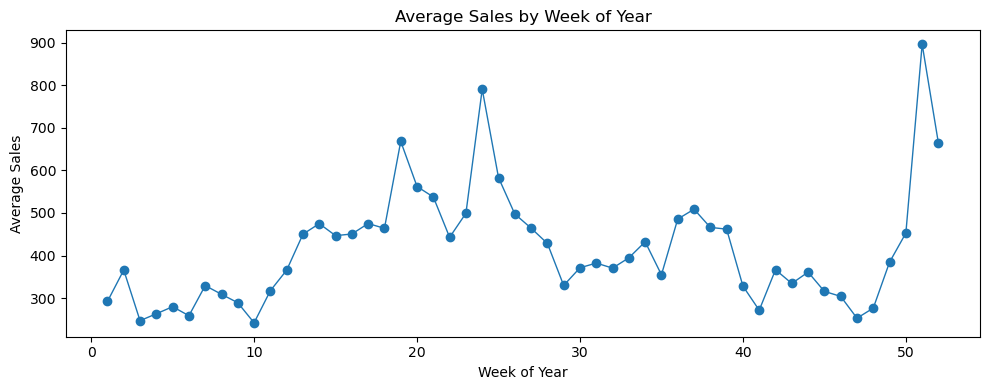

In [90]:
df2['week_of_year'] = df2.index.isocalendar().week

avg_week = (
    df2.groupby('week_of_year')['total']
       .mean()
)

plt.figure(figsize=(10,4))
plt.plot(avg_week.index, avg_week.values, marker='o', linewidth=1)
plt.title('Average Sales by Week of Year')
plt.ylabel('Average Sales')
plt.xlabel('Week of Year')
plt.tight_layout()
plt.show()


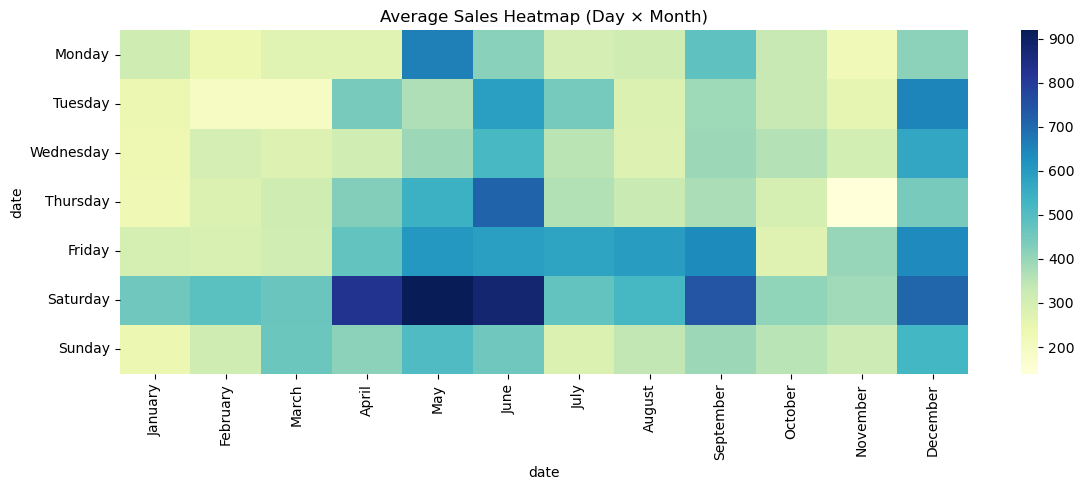

In [91]:
pivot = df2.pivot_table(
    values='total',
    index=df2.index.day_name(),
    columns=df2.index.month_name(),
    aggfunc='mean'
).reindex(index=dow_order, columns=month_order)

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Average Sales Heatmap (Day × Month)')
plt.tight_layout()
plt.show()


## Model 1: Linear Regession

In [739]:
# features= ['total_employees','month', 'week', 'year', 'quarter']
features= ['total_employees','month', 'year', 'quarter']

In [740]:
# Ensure chronological order (time-series split assumes this)
df2 = df2.sort_values('date').reset_index(drop=True)

# Avoid target leakage from imputation: keep only rows with known target
# (safe even if you already dropped missing totals earlier)
df2 = df2.dropna(subset=['total']).copy()

X = df2[features].copy()
y = df2['total'].copy()

In [741]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total_employees  946 non-null    Int64
 1   month            946 non-null    int32
 2   year             946 non-null    int32
 3   quarter          946 non-null    int32
dtypes: Int64(1), int32(3)
memory usage: 19.5 KB


In [742]:
X.head()

,total_employees,month,year,quarter
0,0,11,2022,4
1,0,11,2022,4
2,0,11,2022,4
3,0,11,2022,4
4,0,11,2022,4


In [743]:
split_index = int(len(df2) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [744]:
# (Removed) Casting to int here was ineffective because it happened AFTER the split.
# Keep features numeric; preprocessing is handled in the model pipeline below.

In [745]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Linear Regression works better with scaling. Also impute any missing feature values.
lr_model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression()),
])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [746]:
# Predictions
y_pred = lr_model.predict(X_test)

Linear Regression MSE: 137970.65269608027
Linear Regression R²: 0.00555510612072907


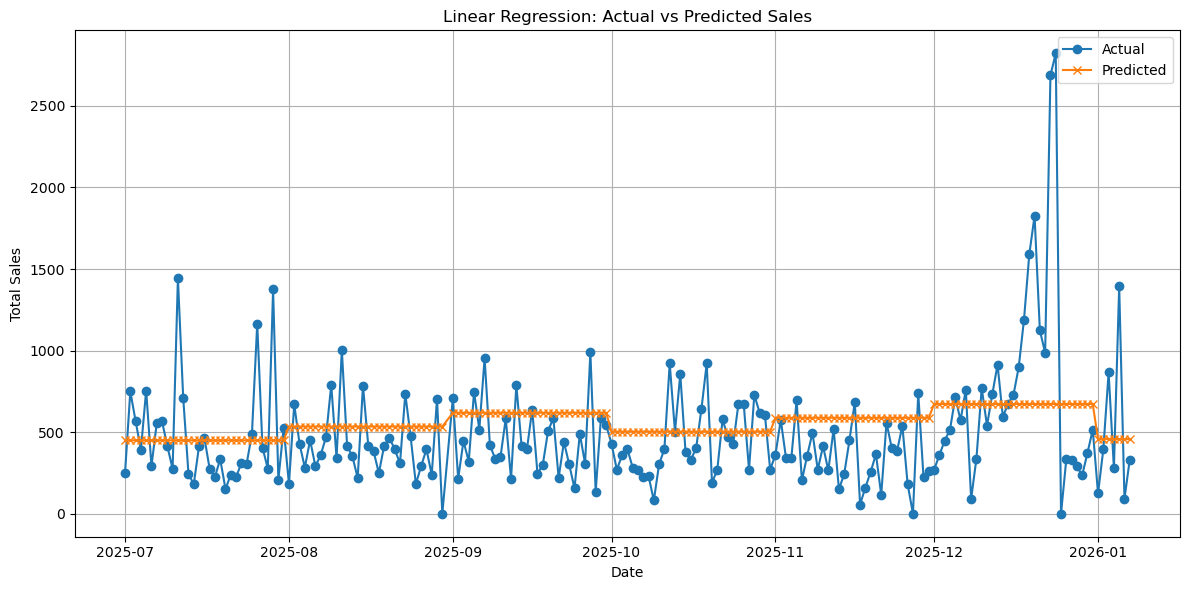

In [747]:
from sklearn.metrics import mean_squared_error, r2_score 


# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)

# ------------------------
# 4. Visualize Predictions
# ------------------------
plt.figure(figsize=(12,6))
plt.plot(df2['date'].iloc[split_index:], y_test, label="Actual", marker='o')
plt.plot(df2['date'].iloc[split_index:], y_pred, label="Predicted", marker='x')
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [748]:
rmse= round(np.sqrt(mse),2)
print('RMSE',rmse)

RMSE 371.44


## Model 2: Random Forest

In [749]:
df2.columns

Index(['date', 'day', 'time', 'total', 'total_employees_hours',
       'total_employees', 'total_tips', 'month', 'week', 'year', 'quarter',
       'is_weekend', 'is_future', 'is_closed', 'is_suspicious_zero',
       'store_open', 'day_of_week', 'month_name', 'week_of_year'],
      dtype='object')

In [750]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train model
rf = RandomForestRegressor(
    n_estimators=200,  # number of trees
    max_depth=None,    # let trees expand fully
    random_state=42,
    n_jobs=-1          # use all CPU cores
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

In [751]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
rmse= round(np.sqrt(mse),2)
print('RMSE',rmse)

print("Random Forest MSE:", mse)
print("Random Forest RMSE:", rmse)
print("Random Forest MAE:", mae)
print("Random Forest R²:", r2)


RMSE 360.14
Random Forest MSE: 129698.27116424721
Random Forest RMSE: 360.14
Random Forest MAE: 235.38224041097982
Random Forest R²: 0.06517957997658319


In [752]:
feat_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feat_importances)

           Feature  Importance
1            month    0.486510
2             year    0.338554
3          quarter    0.144395
0  total_employees    0.030541


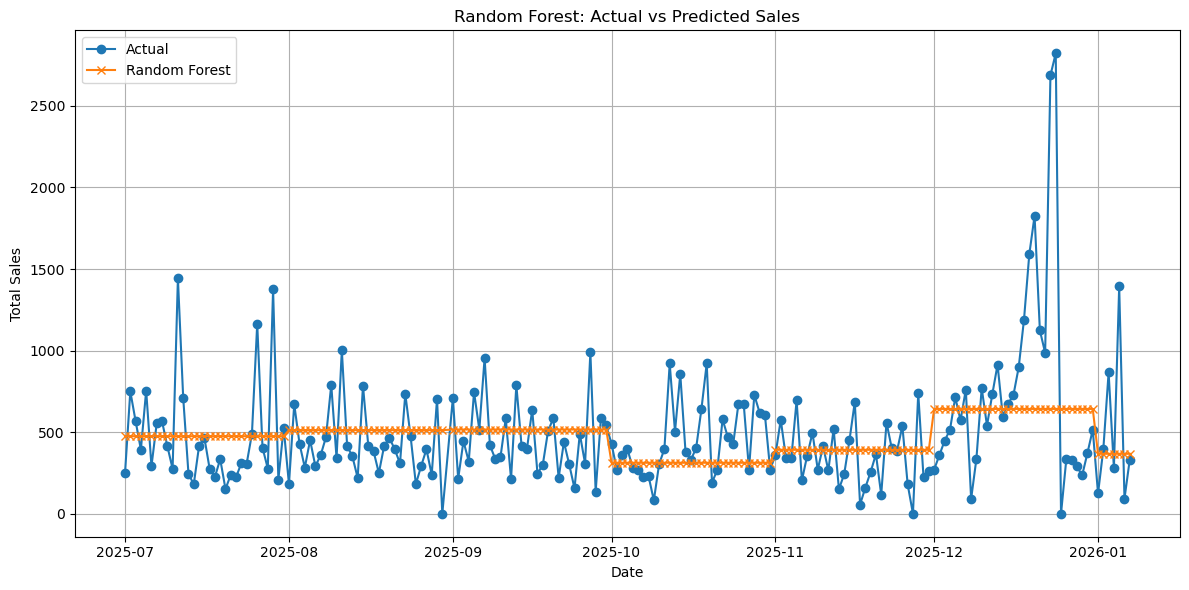

In [753]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df2['date'].iloc[split_index:], y_test, label="Actual", marker='o')
plt.plot(df2['date'].iloc[split_index:], y_pred_rf, label="Random Forest", marker='x')
plt.title("Random Forest: Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Model 3: ARIMA( Auto Regressuve Integrated Moving Average)

In [754]:
# Ensure date is a clean datetime index (ARIMA can't handle NaT at the ends)
df = df2.copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with missing dates (they become NaT and break pd.date_range / predict ranges)
df = df.dropna(subset=["date"]).sort_values("date").reset_index(drop=True)

# For time-series modeling, also drop missing target values
sales = df["total"].dropna()

# Use date as index
sales = sales.copy()
sales.index = df.loc[sales.index, "date"]
sales = sales.sort_index()

In [755]:
# ARIMA needs a stationary series (constant mean/variance). Use ADF test:

from statsmodels.tsa.stattools import adfuller

result = adfuller(sales.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.7118462553244935
p-value: 3.6638306072166623e-09


In [756]:
# Optional (not required): pmdarima auto_arima helper
# If you have it installed locally you can uncomment these lines.
# !pip install pmdarima

In [765]:
# Optional: auto_arima (requires pmdarima)
try:
    from pmdarima import auto_arima
except ImportError:
    auto_arima = None
    print("pmdarima not installed; skipping auto_arima. (This is OK.)")

if auto_arima is not None:
    model = auto_arima(sales, seasonal=False, stepwise=True, trace=True)
    print(model.summary())

order = model.order
seasonal_order = model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13806.815, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13629.353, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13422.115, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13804.816, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13398.503, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13398.481, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13550.141, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13397.922, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13507.585, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13401.537, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=13491.126, Time=0.06 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0]             :

In [766]:
from statsmodels.tsa.arima.model import ARIMA

# Example: If auto_arima suggested (2,1,2)
model = ARIMA(sales, order=order)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                  946
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -6684.372
Date:                Wed, 11 Feb 2026   AIC                          13384.744
Time:                        19:09:53   BIC                          13423.553
Sample:                             0   HQIC                         13399.535
                                - 946                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2003      0.040     -4.991      0.000      -0.279      -0.122
ar.L2         -0.7800      0.039    -20.157      0.000      -0.856      -0.704
ar.L3          0.2925      0.030      9.595      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


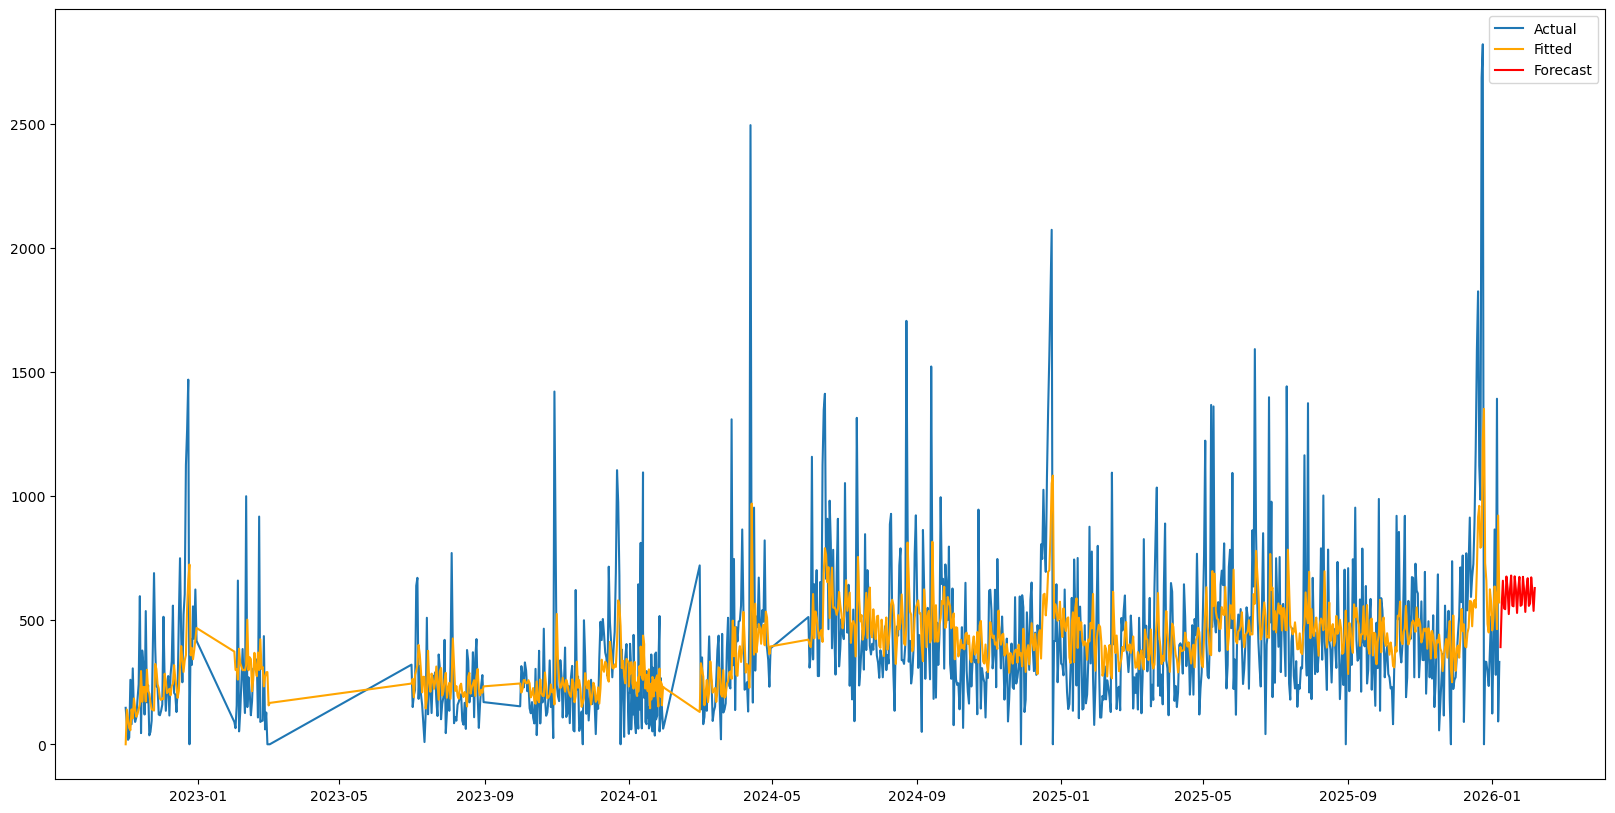

Sales MAE: 192.77
Sales RMSE: 284.89


In [767]:
# Use robust start/end dates (avoid NaT issues)
start_date = sales.index.min()
end_date = sales.index.max()

fitted_values = model_fit.predict(start=start_date, end=end_date)
forecast = model_fit.forecast(steps=30)

future_dates = pd.date_range(
    start=end_date + pd.Timedelta(days=1),
    periods=30,
    freq="D",
)

plt.figure(figsize=(20,10))
plt.plot(sales, label="Actual")
plt.plot(fitted_values, label="Fitted", color="orange")
plt.plot(future_dates, forecast, label="Forecast", color="red")
plt.legend()
plt.show()


mae = mean_absolute_error(sales, fitted_values)
rmse = np.sqrt(mean_squared_error(sales, fitted_values))

print(f"Sales MAE: {mae:.2f}")
print(f"Sales RMSE: {rmse:.2f}")

In [768]:
print(sales.mean())

404.316733615222


# SARIMAX MODEL

##### Since ARIMA predicted the daily sales properly but it couldnt pickup the spikes, holidays and the sale drops in between we will use SARIMAX

In [770]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMAX model
sarimax_model = SARIMAX(sales, 
                        order=order, 
                        seasonal_order=seasonal_order, 
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)

print(sarimax_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                  946
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -6657.821
Date:                Wed, 11 Feb 2026   AIC                          13331.642
Time:                        19:10:36   BIC                          13370.417
Sample:                             0   HQIC                         13346.422
                                - 946                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2149      0.033     -6.565      0.000      -0.279      -0.151
ar.L2         -0.8009      0.035    -22.610      0.000      -0.870      -0.731
ar.L3          0.2805      0.034      8.324      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


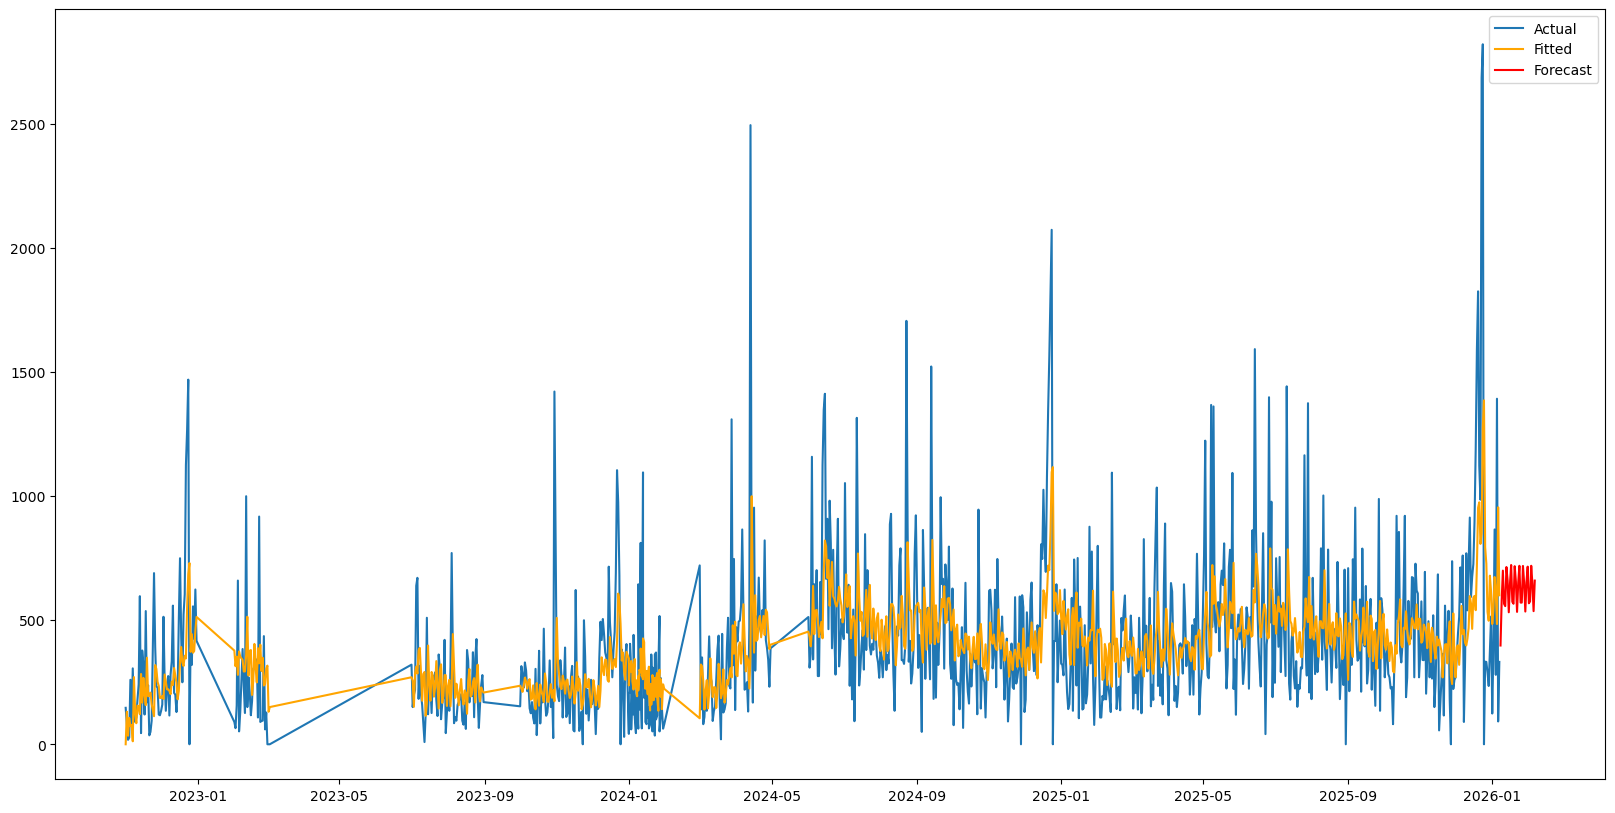

Sales MAE: 192.80
Sales RMSE: 284.73


In [771]:

# Use robust start/end dates (avoid NaT issues)
start_date = sales.index.min()
end_date = sales.index.max()

fitted_values = sarimax_result.predict(start=start_date, end=end_date)
forecast = sarimax_result.forecast(steps=30)

future_dates = pd.date_range(
    start=end_date + pd.Timedelta(days=1),
    periods=30,
    freq="D",
)

plt.figure(figsize=(20,10))
plt.plot(sales, label="Actual")
plt.plot(fitted_values, label="Fitted", color="orange")
plt.plot(future_dates, forecast, label="Forecast", color="red")
plt.legend()
plt.show()


mae = mean_absolute_error(sales, fitted_values)
rmse = np.sqrt(mean_squared_error(sales, fitted_values))

print(f"Sales MAE: {mae:.2f}")
print(f"Sales RMSE: {rmse:.2f}")

## Model 4: AR Model

In [226]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   946 non-null    datetime64[ns]
 1   day                    946 non-null    string        
 2   time                   946 non-null    string        
 3   total                  946 non-null    float64       
 4   total_employees_hours  946 non-null    float64       
 5   total_employees        946 non-null    Int64         
 6   total_tips             946 non-null    float64       
 7   month                  946 non-null    int32         
 8   week                   946 non-null    UInt32        
 9   year                   946 non-null    int32         
 10  quarter                946 non-null    int32         
 11  is_weekend             946 non-null    int64         
 12  is_future              946 non-null    bool          
 13  is_cl

In [227]:
# # Ensure date is index
df = df2.sort_values("date")
df.set_index("date", inplace=True)

# Select only sales column
sales = df["total"]

In [228]:
train_data, test_data = sales[:-100], sales[-100:]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


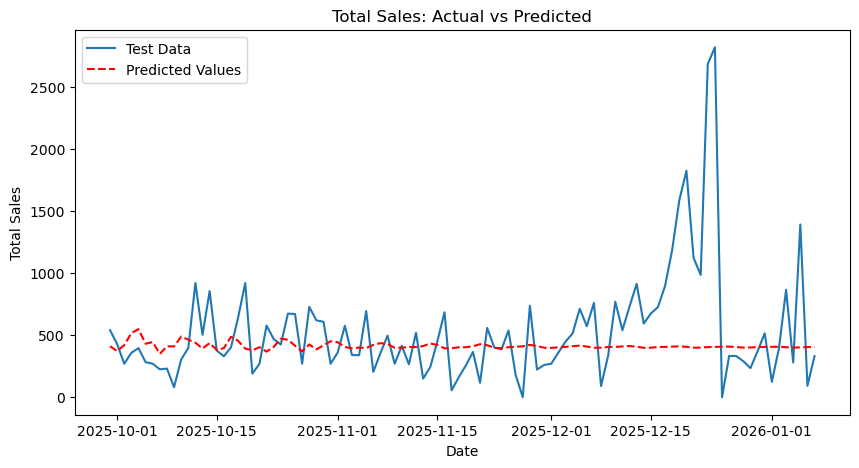

RMSE: 464.41


In [229]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Ensure date is index
df = df2.sort_values("date")
df.set_index("date", inplace=True)

# Select only the sales column
sales = df["total"]

# Split into train and test
train_data, test_data = sales[:-100], sales[-100:]

# Fit AutoReg model
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# Make predictions with fitted model
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Total Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# RMSE
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


# Model 5: MA Model

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


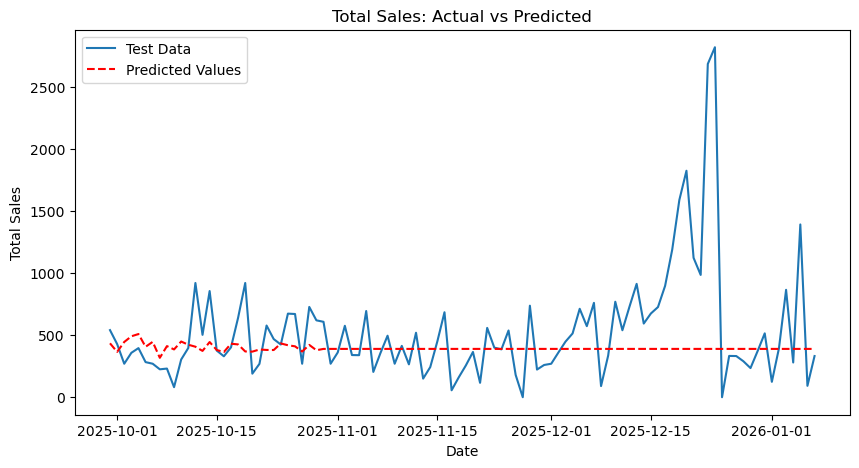

RMSE: 468.04


In [230]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ensure date is index
df = df2.sort_values("date")
df.set_index("date", inplace=True)

# Select only the sales column
sales = df["total"]

# Split into train and test
train_data, test_data = sales[:-100], sales[-100:]

# Fit MA model for that in order make the first 2 parameter that is AR and I and change the third value ie MA
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# Make predictions with fitted model
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Total Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# RMSE
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


# Model 6: ARMA MODEL

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


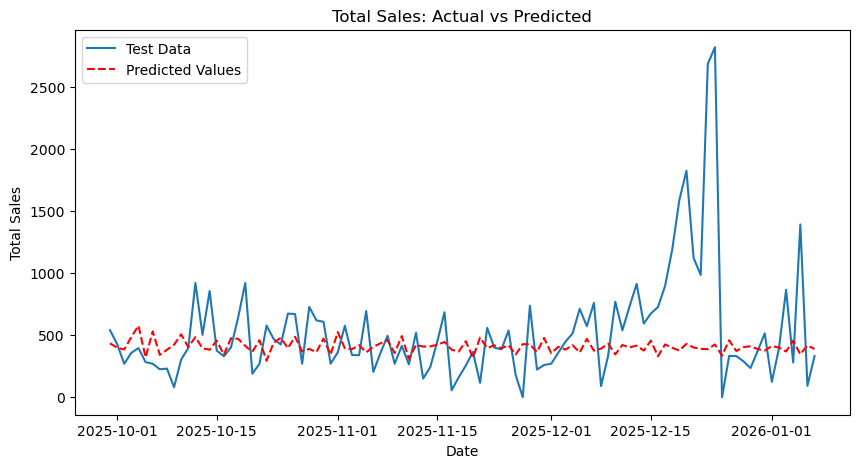

RMSE: 467.24
CPU times: user 4min 4s, sys: 50.4 s, total: 4min 54s
Wall time: 45.7 s


In [231]:
%%time
# Fit ARMA model for that in order make the 2nd parameter that is I and change the first and third value ie ARMA
model = ARIMA(train_data, order=(10,0,30))
model_fit = model.fit()

# Make predictions with fitted model
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Total Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# RMSE
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


In [232]:
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings
warnings.simplefilter("ignore", ConvergenceWarning)

sel = arma_order_select_ic(train_data, max_ar=5, max_ma=5, ic=['aic','bic'])
print("Best order by AIC:", sel.aic_min_order)
print("Best order by BIC:", sel.bic_min_order)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best order by AIC: (5, 5)
Best order by BIC: (2, 1)


### The RMSE is way to high for a sales data within ranging 300-1500 is bad

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


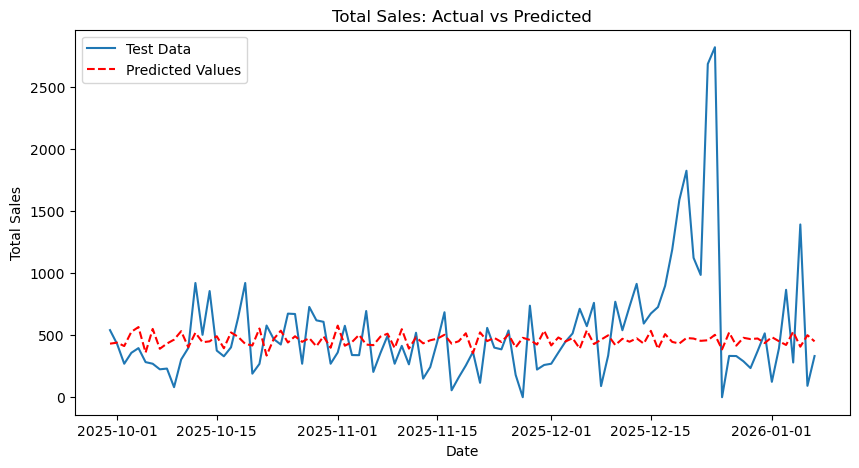

RMSE: 454.64


In [233]:
# Fit ARMA model for that in order make the 2nd parameter that is I and change the first and third value ie ARMA
model = ARIMA(train_data, order=(10,1,30))
model_fit = model.fit()

# Make predictions with fitted model
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Total Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# RMSE
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


## Best Model: ML Forecasting (lags + rolling + calendar)

This section builds a proper daily time series, compares against strong baselines, and trains a boosted model with time-series validation.


In [234]:
import numpy as np
import pandas as pd

from pandas.tseries.holiday import USFederalHolidayCalendar

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import HistGradientBoostingRegressor


def smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + eps))


def regression_report(name, y_true, y_pred):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = float(mean_absolute_error(y_true, y_pred))
    s = float(smape(y_true, y_pred))
    acc = float(100.0 - s)  # "accuracy" as (100 - sMAPE)
    print(f"{name}\n  RMSE: {rmse:.2f}\n  MAE:  {mae:.2f}\n  sMAPE: {s:.2f}%\n  Forecast Accuracy (100-sMAPE): {acc:.2f}%\n")


# 1) Load and create DAILY total series
raw = pd.read_excel("../merged_data.xlsx")
raw["date"] = pd.to_datetime(raw.get("date"), errors="coerce")
raw["total"] = pd.to_numeric(raw.get("total"), errors="coerce")
raw = raw.dropna(subset=["date"]).copy()

# Aggregate to 1 row per day (handles duplicate dates)
daily = raw.groupby("date", as_index=True)["total"].sum().sort_index()

# Build continuous daily index (needed for true day-based lags)
full_idx = pd.date_range(daily.index.min(), daily.index.max(), freq="D")
y_raw = daily.reindex(full_idx)              # NaN where missing day

y_filled = y_raw.fillna(0.0)                # assume missing day = 0 sales (closed/missing)


# 2) Feature engineering (calendar + lags + rolling stats)
feat = pd.DataFrame(index=full_idx)
feat["y"] = y_raw
feat["y_filled"] = y_filled

feat["dow"] = feat.index.dayofweek
feat["month"] = feat.index.month
feat["week"] = feat.index.isocalendar().week.astype(int)
feat["year"] = feat.index.year
feat["is_weekend"] = (feat["dow"] >= 5).astype(int)

holidays = USFederalHolidayCalendar().holidays(start=feat.index.min(), end=feat.index.max())
feat["is_holiday"] = feat.index.normalize().isin(holidays).astype(int)

# Lags
for lag in [1, 7, 14, 28]:
    feat[f"lag_{lag}"] = feat["y_filled"].shift(lag)

# Rolling features (shifted to avoid leakage)
feat["roll_mean_7"] = feat["y_filled"].shift(1).rolling(7).mean()
feat["roll_mean_28"] = feat["y_filled"].shift(1).rolling(28).mean()
feat["roll_std_7"] = feat["y_filled"].shift(1).rolling(7).std()
feat["weekly_change"] = feat["y_filled"].shift(1) - feat["y_filled"].shift(8)

# Keep ONLY days where the target is known
feat = feat[feat["y"].notna()].copy()

# Drop early rows where lag/rolling features are missing
required = ["lag_28", "roll_mean_28"]
feat = feat.dropna(subset=required)

X = feat.drop(columns=["y"])
y = feat["y"]


# 3) Holdout evaluation (last 90 days)
TEST_DAYS = 90
split = max(1, len(feat) - TEST_DAYS)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Strong baselines
pred_naive_1 = X_test["lag_1"].values
pred_naive_7 = X_test["lag_7"].values

regression_report("Baseline: Naive (t-1)", y_test, pred_naive_1)
regression_report("Baseline: Seasonal Naive (t-7)", y_test, pred_naive_7)


# 4) Boosted model (usually strong for sales)
model = HistGradientBoostingRegressor(
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    max_iter=600,
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

regression_report("Model: HistGradientBoosting (lags+rolling+calendar)", y_test, pred)


# 5) Walk-forward validation on train (time-series CV)
tscv = TimeSeriesSplit(n_splits=5)
cv_rmse = []
cv_smape = []

for fold, (tr_idx, va_idx) in enumerate(tscv.split(X_train), 1):
    X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

    m = HistGradientBoostingRegressor(
        random_state=42,
        max_depth=6,
        learning_rate=0.05,
        max_iter=600,
    )
    m.fit(X_tr, y_tr)
    p = m.predict(X_va)

    cv_rmse.append(np.sqrt(mean_squared_error(y_va, p)))
    cv_smape.append(smape(y_va, p))

print("TimeSeriesSplit (train only)")
print(f"  Avg RMSE:  {np.mean(cv_rmse):.2f} ± {np.std(cv_rmse):.2f}")
print(f"  Avg sMAPE: {np.mean(cv_smape):.2f}% ± {np.std(cv_smape):.2f}%")


Baseline: Naive (t-1)
  RMSE: 464.12
  MAE:  244.89
  sMAPE: 49.99%
  Forecast Accuracy (100-sMAPE): 50.01%

Baseline: Seasonal Naive (t-7)
  RMSE: 627.14
  MAE:  370.94
  sMAPE: 71.32%
  Forecast Accuracy (100-sMAPE): 28.68%

Model: HistGradientBoosting (lags+rolling+calendar)
  RMSE: 158.95
  MAE:  36.85
  sMAPE: 60.09%
  Forecast Accuracy (100-sMAPE): 39.91%

TimeSeriesSplit (train only)
  Avg RMSE:  115.34 ± 68.01
  Avg sMAPE: 13.68% ± 12.69%


### Optional: Quick tuning + log-transform (often improves RMSE)

Runs a tiny search over a few settings and picks the best by time-series CV.


In [235]:
from sklearn.compose import TransformedTargetRegressor

param_grid = [
    {"max_depth": 3, "learning_rate": 0.05, "max_iter": 400},
    {"max_depth": 4, "learning_rate": 0.05, "max_iter": 600},
    {"max_depth": 6, "learning_rate": 0.05, "max_iter": 600},
    {"max_depth": 6, "learning_rate": 0.03, "max_iter": 900},
]

candidates = []

# Two variants: plain + log1p(target)
for params in param_grid:
    candidates.append((
        f"HistGBR plain {params}",
        HistGradientBoostingRegressor(random_state=42, **params),
    ))
    candidates.append((
        f"HistGBR log1p {params}",
        TransformedTargetRegressor(
            regressor=HistGradientBoostingRegressor(random_state=42, **params),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
    ))

best = None

tscv = TimeSeriesSplit(n_splits=5)

for name, cand in candidates:
    rmses = []
    for tr_idx, va_idx in tscv.split(X_train):
        X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        cand.fit(X_tr, y_tr)
        p = cand.predict(X_va)
        rmses.append(np.sqrt(mean_squared_error(y_va, p)))

    avg = float(np.mean(rmses))
    std = float(np.std(rmses))
    print(f"{name}\n  CV RMSE: {avg:.2f} ± {std:.2f}\n")

    if best is None or avg < best[0]:
        best = (avg, std, name, cand)

best_rmse, best_std, best_name, best_model = best
print("=" * 60)
print(f"BEST by CV RMSE: {best_name}")
print(f"CV RMSE: {best_rmse:.2f} ± {best_std:.2f}")

# Fit best model on full train and evaluate holdout
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
regression_report(f"Best model holdout ({best_name})", y_test, best_pred)


HistGBR plain {'max_depth': 3, 'learning_rate': 0.05, 'max_iter': 400}
  CV RMSE: 111.98 ± 63.93

HistGBR log1p {'max_depth': 3, 'learning_rate': 0.05, 'max_iter': 400}
  CV RMSE: 119.53 ± 69.81

HistGBR plain {'max_depth': 4, 'learning_rate': 0.05, 'max_iter': 600}
  CV RMSE: 115.22 ± 67.82

HistGBR log1p {'max_depth': 4, 'learning_rate': 0.05, 'max_iter': 600}
  CV RMSE: 122.57 ± 66.54

HistGBR plain {'max_depth': 6, 'learning_rate': 0.05, 'max_iter': 600}
  CV RMSE: 115.34 ± 68.01

HistGBR log1p {'max_depth': 6, 'learning_rate': 0.05, 'max_iter': 600}
  CV RMSE: 123.25 ± 68.04

HistGBR plain {'max_depth': 6, 'learning_rate': 0.03, 'max_iter': 900}
  CV RMSE: 114.16 ± 67.20

HistGBR log1p {'max_depth': 6, 'learning_rate': 0.03, 'max_iter': 900}
  CV RMSE: 123.06 ± 66.80

BEST by CV RMSE: HistGBR plain {'max_depth': 3, 'learning_rate': 0.05, 'max_iter': 400}
CV RMSE: 111.98 ± 63.93
Best model holdout (HistGBR plain {'max_depth': 3, 'learning_rate': 0.05, 'max_iter': 400})
  RMSE: 162.